Number of trees: 0050 Accuracy: 0.757 Standard Deviation: (0.046)
Number of trees: 0100 Accuracy: 0.766 Standard Deviation: (0.049)
Number of trees: 0500 Accuracy: 0.753 Standard Deviation: (0.050)
Number of trees: 1000 Accuracy: 0.757 Standard Deviation: (0.051)
Number of trees: 2500 Accuracy: 0.755 Standard Deviation: (0.056)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a22acf150>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22acf9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a22abb8d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a229c22d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a229c2ad0>,
 'means': [<matplotlib.lines.Line2D at 0x1a229c26d0>,
  <matplotlib.lines.Line2D at 0x1a22b09950>]}

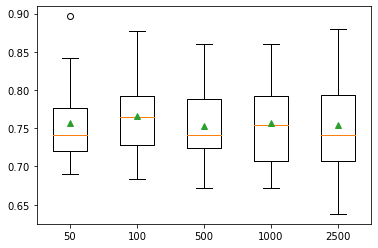

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [50, 100, 500, 1000, 2500]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_validate(model, X_train, y_train, scoring='accuracy',cv=cv,n_jobs=-1)
    scores = scores['test_score']
    return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('Number of trees: %s Accuracy: %.3f Standard Deviation: (%.3f)' % (name.zfill(4), np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)

In [236]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(model, X_train, y_train, scoring='accuracy',cv=cv,n_jobs=-1)
#scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [238]:
scores = scores['test_score']

In [239]:
scores

array([0.70689655, 0.72413793, 0.74137931, 0.72413793, 0.70689655,
       0.72413793, 0.73684211, 0.77192982, 0.77192982, 0.71929825,
       0.72413793, 0.70689655, 0.81034483, 0.75862069, 0.75862069,
       0.72413793, 0.68421053, 0.73684211, 0.73684211, 0.75438596,
       0.84482759, 0.70689655, 0.82758621, 0.62068966, 0.63793103,
       0.67241379, 0.75438596, 0.68421053, 0.8245614 , 0.71929825])

In [242]:
models

{'10': BaggingClassifier(),
 '50': BaggingClassifier(n_estimators=50),
 '100': BaggingClassifier(n_estimators=100),
 '500': BaggingClassifier(n_estimators=500)}